## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
sn.axes_style('whitegrid');
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


## Read the Data

In [2]:
from scipy.io import loadmat

def read_HSI():
  X = loadmat('Datasets/WHUHiLongKou/WHU_Hi_LongKou.mat')['WHU_Hi_LongKou']
  y = loadmat('Datasets/WHUHiLongKou/WHU_Hi_LongKou_gt.mat')['WHU_Hi_LongKou_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (550, 400, 270)
y shape: (550, 400)


### Visualize Bands

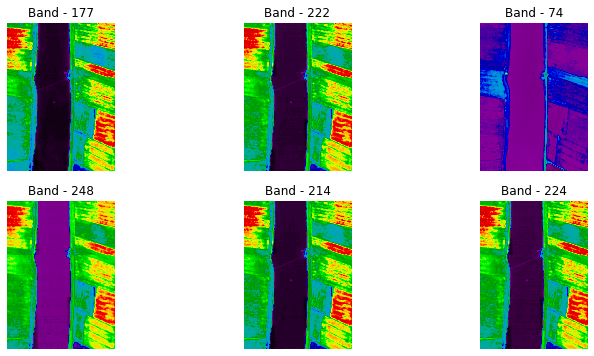

In [3]:
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')

### Visualize the Ground Truth

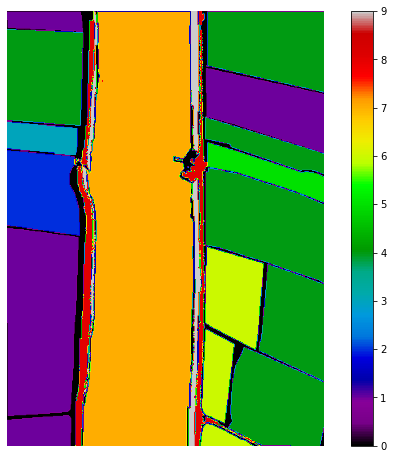

In [4]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()

In [5]:
# reshape data
X = X.reshape(X.shape[0] * X.shape[1], X.shape[2])
y = y.reshape(y.shape[0] * y.shape[1])

## Principal Component Analysis(PCA)


In [6]:
print(X.shape)
print(y.shape)

(220000, 270)
(220000,)


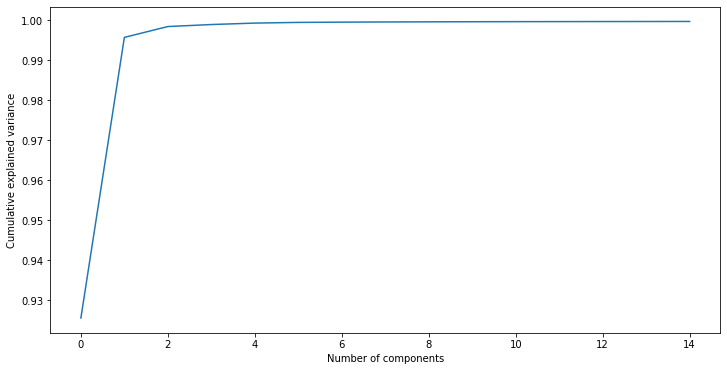

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 15)

principalComponents = pca.fit_transform(X)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()


In [8]:
principalComponents.shape

(220000, 15)

## Without PCA

In [9]:
X = X

y = y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

svm =  SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)

svm.fit(X_train, y_train)

ypred = svm.predict(X_test)

## APPLY Support Vector Machine(SVM)

In [10]:

X_pca = principalComponents

y = y


X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.20, random_state=11, stratify=y)

svm_pca =  SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)

svm_pca.fit(X_train_pca, y_train_pca)

ypred_pca = svm_pca.predict(X_test_pca)

In [11]:
names = [
    "unknown",
        "Corn",
        "Cotton",
        "Sesame",
        "Broad-leaf soybean",
        "Narrow-leaf soybean",
        "Rices",
        "Water",
        "Roads and houses",
        "Mixed weed",]

## Confusion Matrix without PCA

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

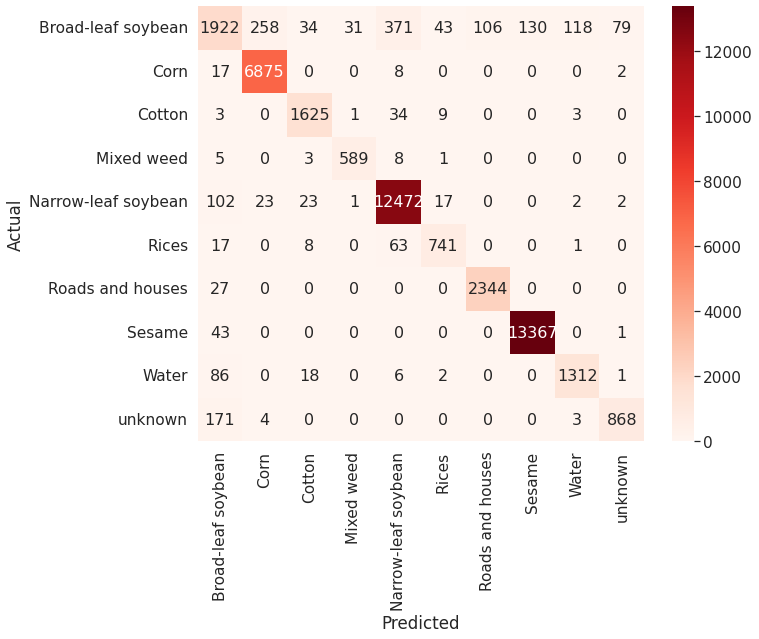

In [12]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')

## Confusion Matrix for PCA SVM

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

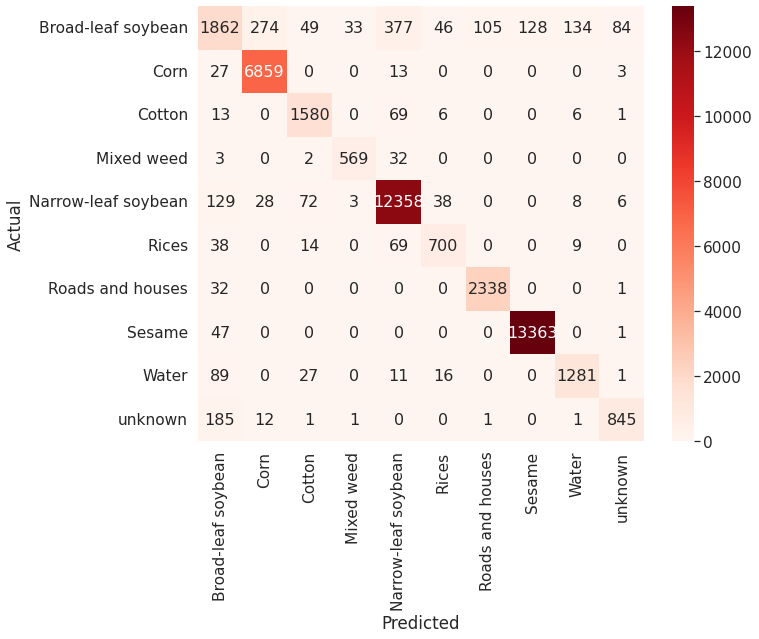

In [13]:
data_pca = confusion_matrix(y_test_pca, ypred_pca)
df_cm_pca = pd.DataFrame(data_pca, columns=np.unique(names), index = np.unique(names))
df_cm_pca.index.name = 'Actual'
df_cm_pca.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_pca, cmap="Reds", annot=True, annot_kws={"size": 16}, fmt='d')

In [14]:
# without pca
print(classification_report(y_test, ypred, target_names = names))

                     precision    recall  f1-score   support

            unknown       0.80      0.62      0.70      3092
               Corn       0.96      1.00      0.98      6902
             Cotton       0.95      0.97      0.96      1675
             Sesame       0.95      0.97      0.96       606
 Broad-leaf soybean       0.96      0.99      0.97     12642
Narrow-leaf soybean       0.91      0.89      0.90       830
              Rices       0.96      0.99      0.97      2371
              Water       0.99      1.00      0.99     13411
   Roads and houses       0.91      0.92      0.92      1425
         Mixed weed       0.91      0.83      0.87      1046

           accuracy                           0.96     44000
          macro avg       0.93      0.92      0.92     44000
       weighted avg       0.95      0.96      0.95     44000



In [15]:
# with PCA
print(classification_report(y_test_pca, ypred_pca, target_names = names))

                     precision    recall  f1-score   support

            unknown       0.77      0.60      0.68      3092
               Corn       0.96      0.99      0.97      6902
             Cotton       0.91      0.94      0.92      1675
             Sesame       0.94      0.94      0.94       606
 Broad-leaf soybean       0.96      0.98      0.97     12642
Narrow-leaf soybean       0.87      0.84      0.86       830
              Rices       0.96      0.99      0.97      2371
              Water       0.99      1.00      0.99     13411
   Roads and houses       0.89      0.90      0.89      1425
         Mixed weed       0.90      0.81      0.85      1046

           accuracy                           0.95     44000
          macro avg       0.91      0.90      0.90     44000
       weighted avg       0.95      0.95      0.95     44000



## Classification Images

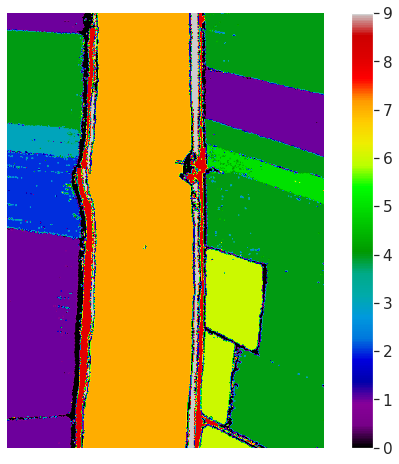

In [16]:
yfinal = svm.predict(X)
clmap = yfinal.reshape(550, 400).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()



---



---



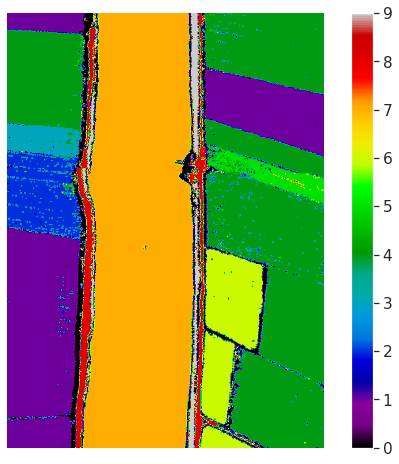

In [17]:
yfinal_pca = svm_pca.predict(X_pca)
clmap = yfinal_pca.reshape(550, 400).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()